In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_and_clean import *
import numpy as np
import pandas as pd

from tslib.src import tsUtils
from tslib.tests import testdata

#warnings.filterwarnings(action='once')

%matplotlib inline
from filter_data import *
from syn_model import *

import warnings
warnings.filterwarnings("ignore")

In [4]:

donors = ["US", "France", "Ireland", "Germany", "Denmark", "Belgium", "Canada", "Australia", 
         "Sweden", "Japan", "Switzerland", "Italy", "Mexico", "Portugal", "Netherlands", 
         "Norway", "Luxembourg", "Spain"]

donor_start = ["2021-02-26", "2021-02-26", "2021-02-26", "2021-02-26", "2021-02-26", "2021-02-26", 
        "2021-03-15", "2021-03-16", "2021-03-26", "2021-03-28", "2021-03-29", "2021-04-02", 
        "2021-04-05", "2021-04-05", "2021-04-06", "2021-04-06", "2021-04-15", "2021-04-22"]

In [5]:

#update_data()

#us = load_clean('NYTimes US')
uscases, usdeaths, usstates = load_clean('NYTimes states')
uscounties_cases, uscounties_deaths, uscounties = load_clean('NYTimes counties')
global_cases, global_deaths = load_clean('JHU global')
us_covid_jhu_cases, us_covid_jhu_deaths = load_clean('JHU US')
# mobility_data_apple = load_clean('mobility Apple')
# mobility_data_google, google_social = load_clean('mobility Google')
# sd_data = load_clean('IHME intervention')
all_population, us_population, usstates_population, uscounties_population = load_clean('population')

uscases_pop_adjusted, usdeaths_pop_adjusted = create_population_adjusted_data(uscases, all_population), \
                                    create_population_adjusted_data(usdeaths, all_population, show_exception = True)
global_cases_pop_adjusted, global_deaths_pop_adjusted = create_population_adjusted_data(global_cases, all_population), \
                                    create_population_adjusted_data(global_deaths, all_population, show_exception = True)

uscounties_cases_pop_adjusted = create_population_adjusted_data(uscounties_cases, all_population, show_exception = True, county = True)
uscounties_deaths_pop_adjusted = create_population_adjusted_data(uscounties_deaths, all_population, county = True)

# state_reopen = load_clean('state reopen')
# #fips_df = pd.read_csv("../COVID/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")

# ctp_us_data = load_clean('CTP US')
# ctp_state_data = load_clean('CTP states')
# ctp_state_pop_adjusted = {stat: create_population_adjusted_data(data, all_population, show_exception=False) for stat, data in ctp_state_data.items()}

These countries/region do not have population data ['Virgin Islands']
These countries/region do not have population data ['Bahamas', 'Burma', 'Cabo Verde', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Diamond Princess', 'Eswatini', 'Gambia', 'Holy See', 'Kyrgyzstan', 'MS Zaandam', 'Micronesia', 'North Macedonia', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Slovakia', 'Summer Olympics 2020', 'Syria', 'Taiwan*', 'West Bank and Gaza']
These countries/region do not have population data ['Adjuntas-Puerto Rico', 'Aguada-Puerto Rico', 'Aguadilla-Puerto Rico', 'Aguas Buenas-Puerto Rico', 'Aibonito-Puerto Rico', 'Anasco-Puerto Rico', 'Anchorage-Alaska', 'Arecibo-Puerto Rico', 'Arroyo-Puerto Rico', 'Barceloneta-Puerto Rico', 'Barranquitas-Puerto Rico', 'Bayamon-Puerto Rico', 'Bristol Bay plus Lake and Peninsula-Alaska', 'Cabo Rojo-Puerto Rico', 'Caguas-Puerto Rico', 'Camuy-Puerto Rico', 'Canovanas-Puerto Rico', 'Carolina-Puerto Rico', 'Catano-Puer

In [6]:
#Filter data (this part might be overlapping some cells, but it should contain most of the varilables that are analyzed. )
# This part might be to split and explain
# This part might be to split and explain
t = 7
#column = list(mobility_data_google.columns).index('retail_and_recreation_percent_change_from_baseline')
global_deaths_filtered = create_filtered_data(global_deaths, 500 )
#the last column of social distancing dataset is the last social distancing measure used by a location
#educational_distancing = get_social_distancing(sd_data, sd_data.columns[-1])

all_data = pd.concat([global_deaths, usdeaths, uscounties_deaths], axis=1).dropna()
all_data_daily = create_rolling_data(all_data, t)

all_data_cases = pd.concat([global_cases, uscases, uscounties_cases], axis=1).dropna()
all_data_cases_daily = create_rolling_data(all_data_cases, t)

all_cases_data_pop = pd.concat([uscases_pop_adjusted,global_cases_pop_adjusted, uscounties_cases_pop_adjusted], axis = 1).dropna()
all_cases_data_pop_daily = create_rolling_data(all_cases_data_pop, t)

all_death_data_pop = pd.concat([usdeaths_pop_adjusted,global_deaths_pop_adjusted, uscounties_deaths_pop_adjusted], axis = 1).dropna()
all_death_data_pop_daily = create_rolling_data(all_death_data_pop, t)

# _, daily_global, intervention_date_global = create_intervention_adjusted_data(global_deaths, educational_distancing, t)
# _, daily_us, intervention_date_us = create_intervention_adjusted_data(usdeaths, educational_distancing, t)
# _, daily_uscounties, intervention_date_uscounties = create_intervention_adjusted_data(uscounties_deaths, educational_distancing, t)

# cases_intervention_adjusted, cases_intervention_adjusted_daily, intervention_date_case = create_intervention_adjusted_data(all_data_cases, educational_distancing, t)
# deaths_intervention_adjusted, deaths_intervention_adjusted_daily, intervention_date_death = create_intervention_adjusted_data(all_data, educational_distancing, t)
#deaths_intervention_adjusted_google, deaths_intervention_adjusted_daily_google, _ = create_intervention_adjusted_data(all_data, google_social, t)

# all_cases_data_pop_adjusted, all_cases_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_cases_data_pop, educational_distancing, t)
# all_death_data_pop_adjusted, all_death_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_death_data_pop, educational_distancing, t)

# hospitalized_pop_adjusted, hospitalized_pop_adjusted_daily, _ = create_intervention_adjusted_data(ctp_state_pop_adjusted['hospitalizedCurrently'], educational_distancing, t, ignore_nan=True)
# icu_pop_adjusted, icu_pop_adjusted_daily, _ = create_intervention_adjusted_data(ctp_state_pop_adjusted['inIcuCurrently'], educational_distancing, t, ignore_nan=True)
# ventilator_pop_adjusted, icu_pop_adjusted_daily, _ = create_intervention_adjusted_data(ctp_state_pop_adjusted['onVentilatorCurrently'], educational_distancing, t, ignore_nan=True)


In [7]:

## Align the data set by discovery date of delta
df = all_cases_data_pop_daily

singVals = 6
target = "Netherlands"
tick_spacing = 90

donors = ["France", "Ireland", "Germany", "Denmark", "Belgium",
         "Sweden", "Switzerland", "Italy", "Portugal", 
         "Norway", "United Kingdom"]

donor_start = ["2021-02-21", "2021-02-26", "2021-03-01", "2021-03-08", "2021-03-25", 
               "2021-03-26", "2021-03-29", "2021-04-02", "2021-04-05", 
               "2021-04-06", "2021-04-05", "2021-02-22"]

target_start = "2021-04-06"
prediction_length = 120

train_length = 50

donor_start_idx = [list(df.index).index(date) - train_length for date in donor_start]
donor_end_idx =  [list(df.index).index(date) + prediction_length for date in donor_start]

target_start_idx = list(df.index).index(target_start) - train_length
target_end_idx = list(df.index).index(target_start) + prediction_length

data_df = df[target][target_start_idx:target_end_idx]
idx = data_df.index
data_df = pd.Series(data_df.values, name = target)
#print(data_df.shape)

for i in range(len(donors)):
    temp_df = df[donors[i]][donor_start_idx[i]:donor_end_idx[i]]
    data_df = pd.concat([data_df, pd.Series(temp_df.values, name = donors[i])], axis = 1)
    
data_df.index = idx



6
['France', 'Ireland', 'Germany', 'Sweden', 'Portugal'] 6


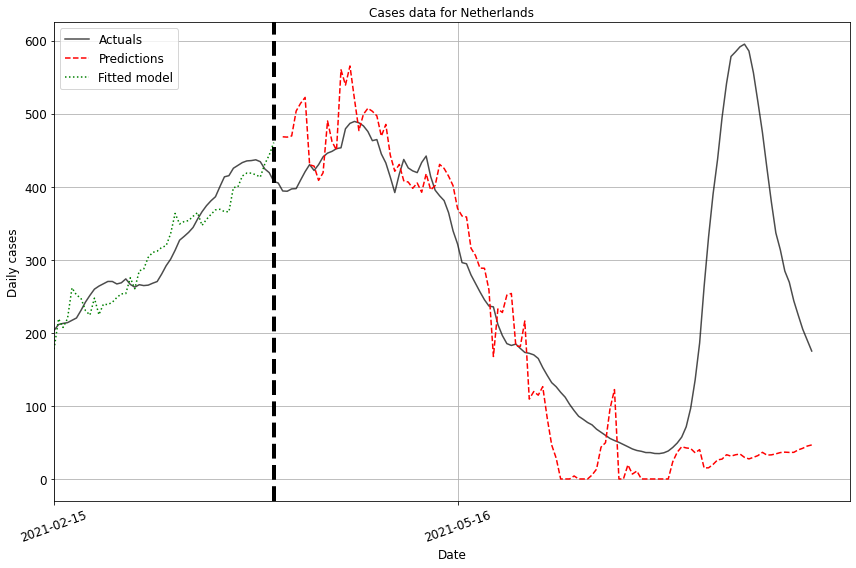

In [8]:
# sc model using the discovery date as intervention date
rscModel =syn_model(target, singVals, [data_df], train_length + prediction_length, train_length, otherStates=donors)
rscModel.fit_model(filter_donor = True, filter_method = 'percentile', singVals_estimate = True, singval_mathod ='auto')

predictions = rscModel.predictions
model_fit = rscModel.model_fit

fig, axes = plt.subplots(1, 1, figsize = (12, 8))

rscModel.plot(figure=fig, axes=axes, title_text="Cases data", ylimit=[], xlimit=[], logy=False, show_donors=False, tick_spacing=tick_spacing, xaxis="Date", yaxis="Daily cases", intervention_date_x_ticks=None, fontsize = 12)
#plt.savefig("../Figures/COVID/"+county_state+".png",bbox_inches='tight')    
plt.tight_layout()

print(rscModel.donors, rscModel.kSingularValues)

plt.show()

6
['France', 'Ireland', 'Germany', 'Denmark', 'Belgium', 'Sweden', 'Switzerland', 'Italy', 'Portugal', 'Norway', 'United Kingdom'] 6


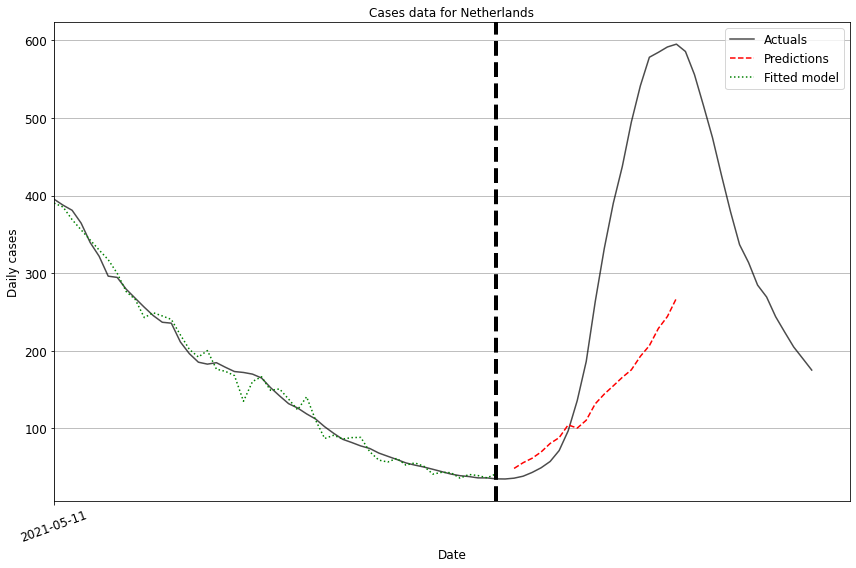

In [24]:
# Make "short prediction" after the discovery date
# delta here is the number of days after the discovery date for the target
# predicting the trend for 20 days
delta = 85
rscModel =syn_model(target, singVals, [data_df.iloc[delta:]], train_length + 20, train_length, otherStates=donors)
rscModel.fit_model(filter_donor = False, filter_method = 'percentile', singVals_estimate = True, singval_mathod ='auto')

predictions = rscModel.predictions
model_fit = rscModel.model_fit

fig, axes = plt.subplots(1, 1, figsize = (12, 8))

rscModel.plot(figure=fig, axes=axes, title_text="Cases data", ylimit=[], xlimit=[], logy=False, show_donors=False, tick_spacing=tick_spacing, xaxis="Date", yaxis="Daily cases", intervention_date_x_ticks=None, fontsize = 12)
#plt.savefig("../Figures/COVID/"+county_state+".png",bbox_inches='tight')    
plt.tight_layout()

print(rscModel.donors, rscModel.kSingularValues)

plt.show()

### Other analysis with the US counties

In [87]:
#plt.rcParams['figure.figsize'] = (24.0, 9.0)


lambdas = 1
high_thresh = 120
low_thresh = 30

model = syn_model(target, 7, [df], high_thresh, low_thresh, otherStates = group) #Create a syn_model object
model.fit_model(filter_donor = False, filter_method = 'iqr', ri_method = "diff", filter_metrics = mean_error)
print("Donors # %s"%(len(model.donors)))
print("Model train err %2.4f, Model test err %2.4f"%(model.train_err, model.test_err))


Donors # 6
Model train err 0.2316, Model test err 578.1750


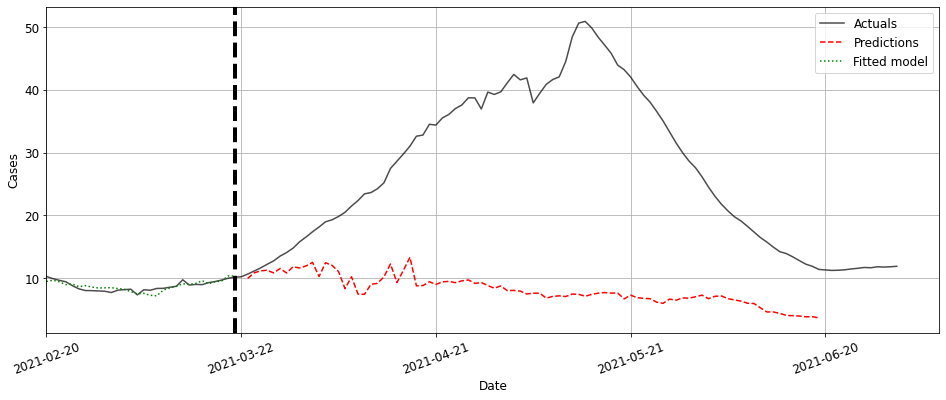

In [88]:
model.plot()

In [90]:
donor_states = ['Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'Rhode Island',
 'Vermont',
 'New Jersey',
 'New York'
]

donors = []
for counties in uscounties_cases.columns:
    names = counties.split('-')
    if names[-1] in donor_states and names[0] != 'Unknown':
        donors.append(counties)


In [157]:
df = all_cases_data_pop_daily
target = 'Japan'

singVals = 9

donor_start = "2021-03-01"
target_start = "2021-04-01"
prediction_length = 50
train_length = 50

donor_start_idx = list(df.index).index(donor_start) - train_length
donor_end_idx =  list(df.index).index(donor_start) + prediction_length

target_start_idx = list(df.index).index(target_start) - train_length
target_end_idx = list(df.index).index(target_start) + prediction_length

target_df = df[target][target_start_idx:target_end_idx]
donor_df = df[donors][donor_start_idx:donor_end_idx]
donor_df.index = target_df.index

df = pd.concat([target_df, donor_df], axis = 1)

#df = df[donors][donor_start_idx:donor_end_idx]



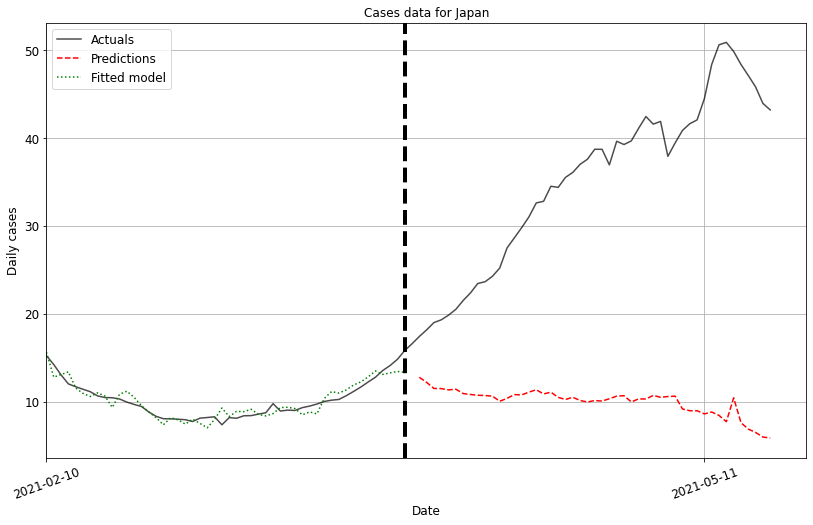

In [159]:
rscModel =syn_model(target, singVals, [df], train_length + prediction_length, train_length, otherStates=donors)
rscModel.fit_model(filter_donor = True, filter_method = 'percentile', singVals_estimate = False, singval_mathod ='auto')

predictions = rscModel.predictions
model_fit = rscModel.model_fit

fig, axes = plt.subplots(1, 1, figsize = (12, 8))

rscModel.plot(figure=fig, axes=axes, title_text="Cases data", ylimit=[], xlimit=[], logy=False, show_donors=False, tick_spacing=tick_spacing, xaxis="Date", yaxis="Daily cases", intervention_date_x_ticks=None, fontsize = 12)
#plt.savefig("../Figures/COVID/"+county_state+".png",bbox_inches='tight')    
plt.tight_layout()


plt.show()

In [139]:
print('donors = ',rscModel.donors, 'singvals:', rscModel.kSingularValues)
    

donors =  ['Addison-Vermont', 'Allegany-New York', 'Atlantic-New Jersey', 'Belknap-New Hampshire', 'Bennington-Vermont', 'Bristol-Massachusetts', 'Bristol-Rhode Island', 'Broome-New York', 'Burlington-New Jersey', 'Cape May-New Jersey', 'Carroll-New Hampshire', 'Cattaraugus-New York', 'Cayuga-New York', 'Chautauqua-New York', 'Chemung-New York', 'Chenango-New York', 'Cheshire-New Hampshire', 'Chittenden-Vermont', 'Clinton-New York', 'Columbia-New York', 'Cortland-New York', 'Cumberland-Maine', 'Cumberland-New Jersey', 'Delaware-New York', 'Dutchess-New York', 'Essex-Massachusetts', 'Essex-New Jersey', 'Essex-New York', 'Essex-Vermont', 'Fairfield-Connecticut', 'Franklin-Maine', 'Franklin-Massachusetts', 'Franklin-New York', 'Franklin-Vermont', 'Fulton-New York', 'Genesee-New York', 'Gloucester-New Jersey', 'Grafton-New Hampshire', 'Grand Isle-Vermont', 'Greene-New York', 'Hamilton-New York', 'Hampden-Massachusetts', 'Hancock-Maine', 'Hartford-Connecticut', 'Herkimer-New York', 'Hillsbo

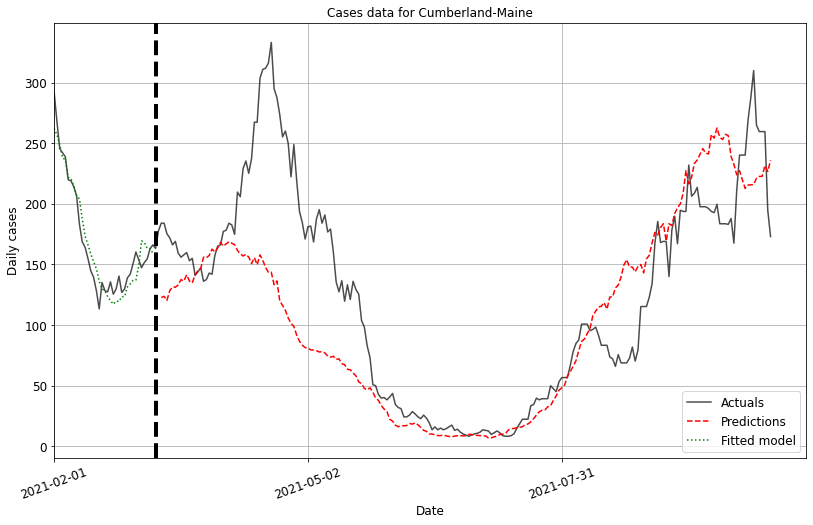

donors =  ['Addison-Vermont', 'Allegany-New York', 'Barnstable-Massachusetts', 'Bennington-Vermont', 'Carroll-New Hampshire', 'Cattaraugus-New York', 'Chenango-New York', 'Cheshire-New Hampshire', 'Chittenden-Vermont', 'Clinton-New York', 'Columbia-New York', 'Delaware-New York', 'Essex-New York', 'Essex-Vermont', 'Franklin-Maine', 'Franklin-Massachusetts', 'Franklin-New York', 'Franklin-Vermont', 'Fulton-New York', 'Grafton-New Hampshire', 'Greene-New York', 'Hamilton-New York', 'Hampshire-Massachusetts', 'Hunterdon-New Jersey', 'Litchfield-Connecticut', 'Livingston-New York', 'Madison-New York', 'Merrimack-New Hampshire', 'Middlesex-Connecticut', 'Newport-Rhode Island', 'Ontario-New York', 'Orleans-New York', 'Orleans-Vermont', 'Otsego-New York', 'Oxford-Maine', 'Rensselaer-New York', 'Rockingham-New Hampshire', 'Rutland-Vermont', 'Saratoga-New York', 'Schoharie-New York', 'Schuyler-New York', 'Seneca-New York', 'St. Lawrence-New York', 'Strafford-New Hampshire', 'Sullivan-New York',

In [95]:
#df = df[df.columns[(df>100).any()]].copy()
start_date = '2021-02-01'
low_thresh_date = '2021-03-10'
df = all_cases_data_pop_daily.loc[start_date:]
df_pop = all_cases_data_pop.loc[start_date:]
high_thresh = df_pop.shape[0]
low_thresh = (pd.to_datetime(low_thresh_date) - pd.to_datetime(start_date)).days

plt.rcParams.update({'font.size': 30})
tick_spacing=90
#FONTSIZE = 28
#sizes = df.applynortheastries.last_valid_index)
#sizes = sizes.fillna(0).astype(int)
singVals=4
trainDF=df.iloc[:low_thresh,:]
testDF=df.iloc[low_thresh+1:high_thresh,:]

#num_rows_to_plot = int(len(targets))+1
#plt.rcParams['figure.figsize'] = (24, num_rows_to_plot*5.0)
plt.rcParams['figure.figsize'] = (26, 8.0)

i=1
for state in ['Cumberland-Maine']:
#otherStates = donors.copy()
    ''''''
    try:
        otherStates = df_pop.columns[(df_pop.iloc[low_thresh] < 
                                      df_pop[state].iloc[low_thresh]+.5*df_pop[state].iloc[low_thresh])&(df_pop.iloc[low_thresh]
                                      > df_pop[state].iloc[low_thresh]-0.5*df_pop[state].iloc[low_thresh])]
    except:
        continue
    otherStates = list(otherStates[otherStates.isin(donors)])

    
    
    if state in otherStates:
        otherStates.remove(state)
        
    
    # Adding outliers:
    for item in ['Jefferson-Alabama','Madison-Alabama','Mobile-Alabama', 'Harris-Texas', 'Dallas-Texas', 'Tarrant-Texas']:
        otherStates.append(item)
    
    rscModel =syn_model(state, singVals, [df], high_thresh, low_thresh, otherStates=otherStates)
    rscModel.fit_model(filter_donor = True, filter_method = 'quantile', singVals_estimate = True, singval_mathod ='auto')
    
    predictions = rscModel.predictions
    model_fit = rscModel.model_fit
     
    fig, axes = plt.subplots(1, 1, figsize = (12, 8))

    rscModel.plot(figure=fig, axes=axes, title_text="Cases data", ylimit=[], xlimit=[], logy=False, show_donors=False, tick_spacing=tick_spacing, xaxis="Date", yaxis="Daily cases", intervention_date_x_ticks=None, fontsize = 12)
    #plt.savefig("../Figures/COVID/"+county_state+".png",bbox_inches='tight')    
    plt.tight_layout()
    

    plt.show()

    print('donors = ',rscModel.donors, 'singvals:', rscModel.kSingularValues)
    